In [208]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cbook as cbook

from sklearn.cluster import KMeans

# Cambridge ward data

In [89]:
in_df = ''
with open(os.path.join('..', 'datasets', 'ward_stats.json'), 'r') as f:
    in_df = pd.read_json(f.read())
in_df = in_df.T
in_df.head()

,All Residents,Area (hectares),Average household size,Number of households,Population density (people per hectare),Residents in communal living,Residents in households
Abbey,9907.0,395.0,2.4,4106.0,25.1,46.0,9861.0
Arbury,9070.0,149.0,2.3,3886.0,60.7,154.0,8916.0
Castle,9785.0,341.0,2.2,2082.0,28.7,5256.0,4529.0
Cherry Hinton,8780.0,368.0,2.4,3676.0,23.8,0.0,8780.0
Coleridge,9386.0,193.0,2.4,3788.0,48.6,409.0,8977.0


## Size of ward vs no. of households

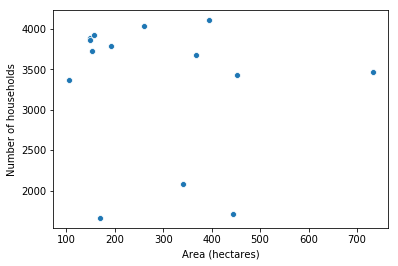

In [90]:
x = 'Area (hectares)'
y = 'Number of households'

sns.scatterplot(data=in_df, x=x, y=y, markers=list(in_df.index))

In [91]:
list(in_df.index)

['Abbey',
 'Arbury',
 'Castle',
 'Cherry Hinton',
 'Coleridge',
 'East Chesterton',
 "King's Hedges",
 'Market',
 'Newnham',
 'Petersfield',
 "Queen Edith's",
 'Romsey',
 'Trumpington',
 'West Chesterton']

### Classify the ward based on K-mean

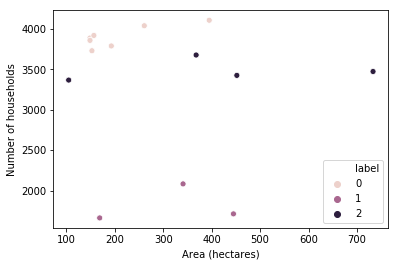

In [156]:
X = in_df[[x, y]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
in_df['label'] = pd.Series(labels, index=in_df.index)

sns.scatterplot(x=x, y=y, hue='label', data=in_df)

# UK wide data

Let's be ambitious and create a UK wide age to income classification

All the data was scrapped using the helper notebook

In [94]:
with open(os.path.join('..', 'datasets', 'uk_ward_age_income.json'), 'r') as f:
    age_income_df = pd.read_json(f.read())
age_income_df.head()

,Ward name,Ward code,LA name,Region name,Annual Income,mean_age
E02000001,Aldersgate,E05009288,City of London,London,79700,41.393898
E02000002,Chadwell Heath,E05000029,Barking and Dagenham,London,38600,36.202509
E02000003,Chadwell Heath,E05000029,Barking and Dagenham,London,46400,36.145246
E02000004,Eastbrook,E05000030,Barking and Dagenham,London,45300,38.983986
E02000005,Valence,E05000040,Barking and Dagenham,London,41000,34.285447


In [157]:
regions = list(age_income_df['Region name'].unique())
la_names = list(age_income_df['LA name'].unique())

/anaconda3/envs/datafellow/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'UK wide')

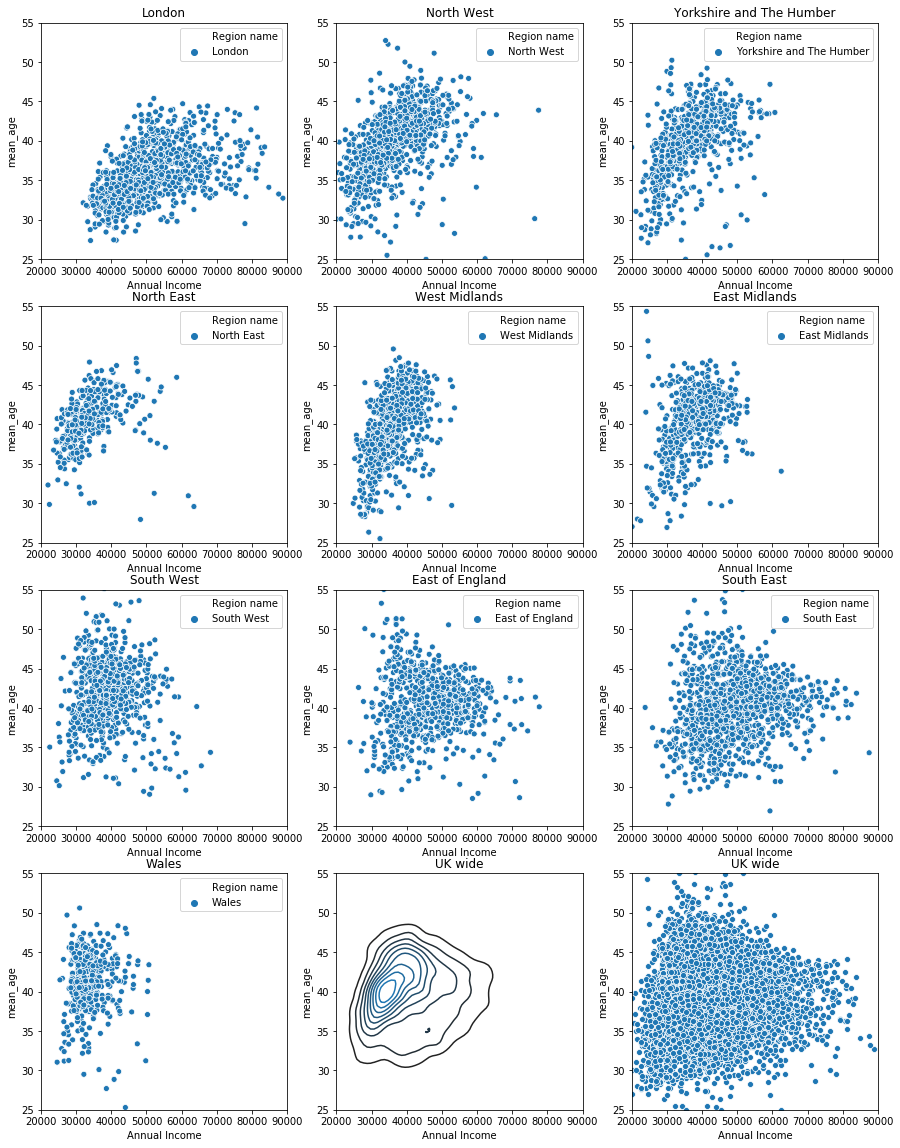

In [153]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(15, 20)
for r in range(0, 4):
    for c in range(0, 3):
        idx = r*3 + c
        if idx >= len(regions):
            break
        sns.scatterplot(x='Annual Income',
                        y='mean_age',
                        hue='Region name',
                        data=age_income_df[age_income_df['Region name'] == regions[idx]],
                        ax=ax[r, c])
        ax[r, c].set_xlim(20000, 90000)
        ax[r, c].set_ylim(25, 55)
        ax[r, c].set_title(regions[idx])
sns.scatterplot(x='Annual Income', y='mean_age', data=age_income_df, ax=ax[3, 2])
ax[3, 1].set_xlim(20000, 90000)
ax[3, 1].set_ylim(25, 55)
ax[3, 1].set_title('UK wide')
sns.kdeplot(age_income_df['Annual Income'], age_income_df['mean_age'], ax=ax[3, 1])
ax[3, 2].set_xlim(20000, 90000)
ax[3, 2].set_ylim(25, 55)
ax[3, 2].set_title('UK wide')

/anaconda3/envs/datafellow/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'UK wide')

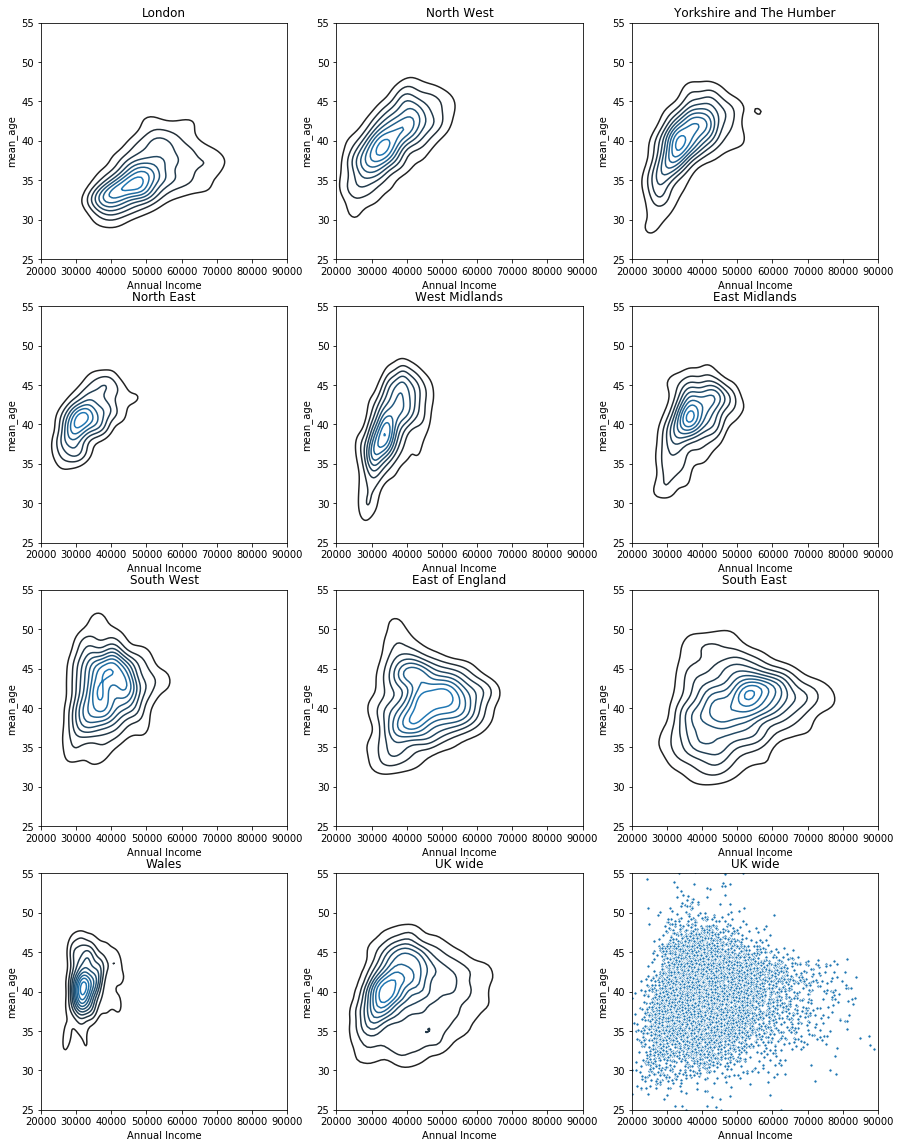

In [182]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(15, 20)
for r in range(0, 4):
    for c in range(0, 3):
        idx = r*3 + c
        if idx >= len(regions):
            break
        # sns.scatterplot(x='Annual Income',
        #                 y='mean_age',
        #                 hue='Region name',
        #                 data=age_income_df[age_income_df['Region name'] == regions[idx]],
        #                 ax=ax[r, c])
        df = age_income_df[age_income_df['Region name'] == regions[idx]]
        sns.kdeplot(df['Annual Income'], df['mean_age'], ax=ax[r, c])
        ax[r, c].set_xlim(20000, 90000)
        ax[r, c].set_ylim(25, 55)
        ax[r, c].set_title(regions[idx])
sns.kdeplot(age_income_df['Annual Income'], age_income_df['mean_age'], ax=ax[3, 1])
ax[3, 1].set_xlim(20000, 90000)
ax[3, 1].set_ylim(25, 55)
ax[3, 1].set_title('UK wide')
sns.scatterplot(x='Annual Income', y='mean_age', data=age_income_df, ax=ax[3, 2], s=10)
ax[3, 2].set_xlim(20000, 90000)
ax[3, 2].set_ylim(25, 55)
ax[3, 2].set_title('UK wide')

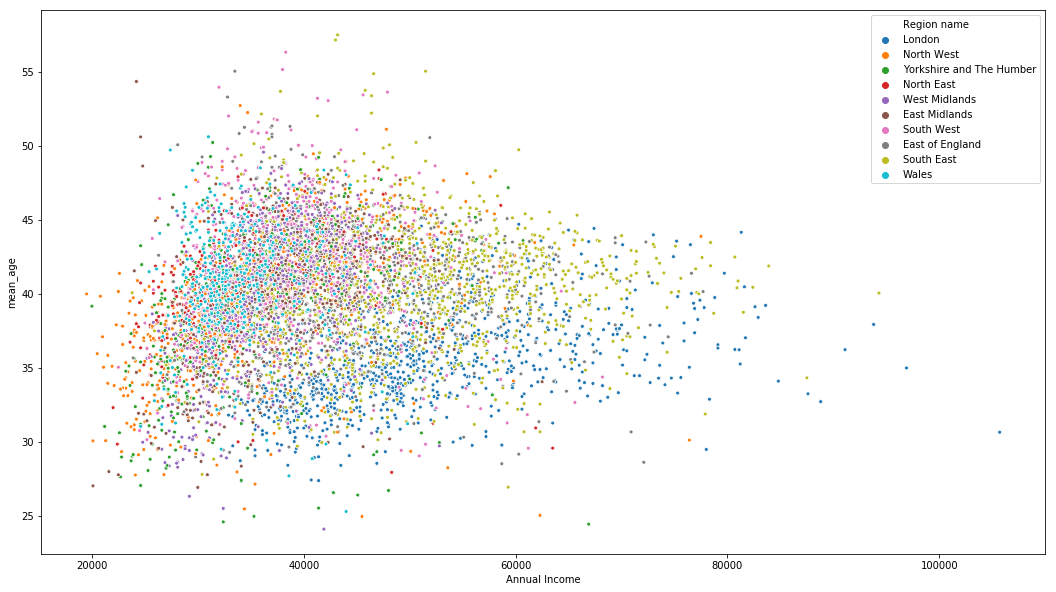

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
sns.scatterplot(x='Annual Income', y='mean_age', hue='Region name', data=age_income_df, s=15)

(30, 48)

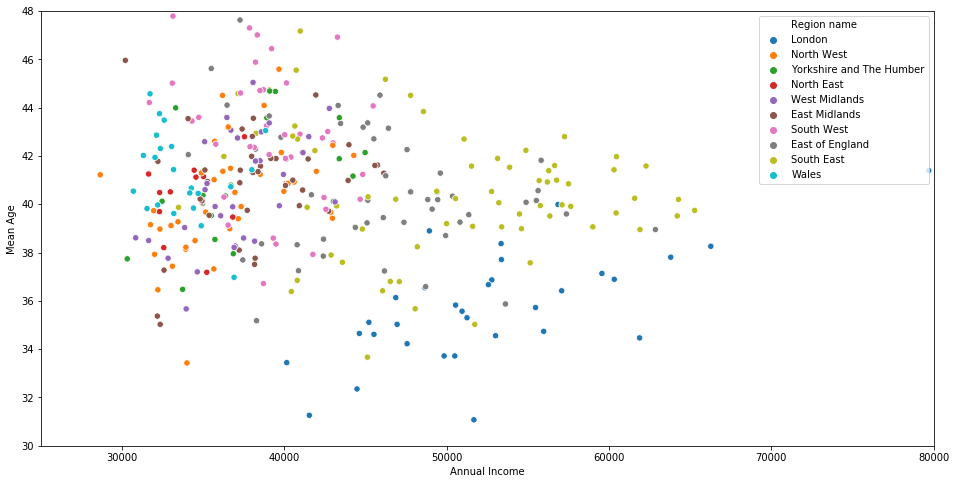

In [184]:
# Local Authority based stats
la_df = []
for la in la_names:
    income = age_income_df[age_income_df['LA name'] == la]['Annual Income'].mean()
    age = age_income_df[age_income_df['LA name'] == la]['mean_age'].mean()
    region = age_income_df[age_income_df['LA name'] == la]['Region name'][0]
    la_df.append({'LA name': la, 'Annual Income': income, 'Mean Age': age, 'Region name': region})
la_df = pd.DataFrame(la_df)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.scatterplot(x='Annual Income', y='Mean Age', hue='Region name', data=la_df, ax=ax, s=40)
ax.set_xlim(25000, 80000)
ax.set_ylim(30, 48)

Text(0.5,1,'Centroid for each UK region')

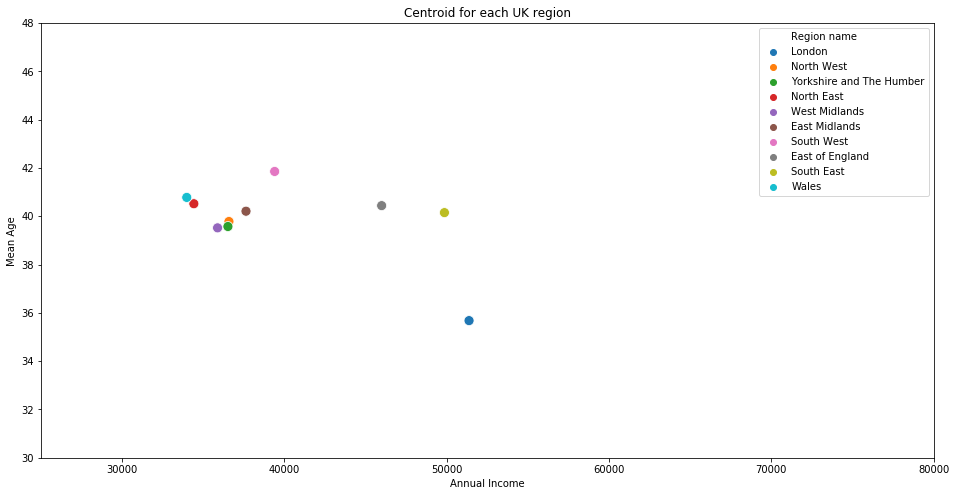

In [177]:
# Region based stats
region_df = []
for reg in regions:
    income = age_income_df[age_income_df['Region name'] == reg]['Annual Income'].mean()
    age = age_income_df[age_income_df['Region name'] == reg]['mean_age'].mean()
    region_df.append({'Annual Income': income, 'Mean Age': age, 'Region name': reg})
region_df = pd.DataFrame(region_df)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.scatterplot(x='Annual Income', y='Mean Age', hue='Region name', data=region_df, ax=ax, s=100)
ax.set_xlim(25000, 80000)
ax.set_ylim(30, 48)
ax.set_title('Centroid for each UK region')

Text(0.5,1,'Centroid and classification for each UK region')

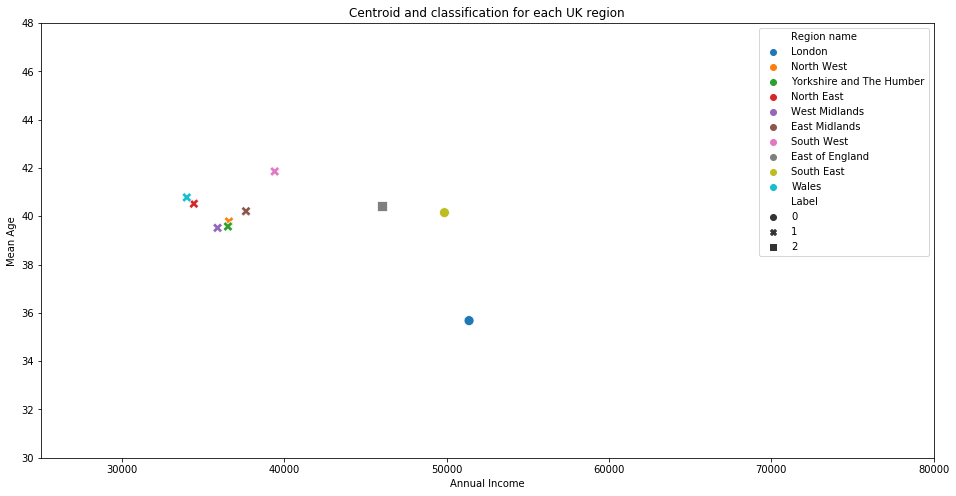

In [404]:
X = region_df[['Annual Income', 'Mean Age']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
region_df = region_df.assign(**{'Label': pd.Series(labels, index=region_df.index)})

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.scatterplot(x='Annual Income', y='Mean Age', hue='Region name', style='Label', data=region_df, ax=ax, s=100)
ax.set_xlim(25000, 80000)
ax.set_ylim(30, 48)
ax.set_title('Centroid and classification for each UK region')

In [324]:
uk_bounds = pd.read_csv(os.path.join('..', 'datasets', 'uk_ward_boundaries.csv'))
uk_bounds_df = uk_bounds.set_index('wd17cd')[['long', 'lat']]

In [372]:
def to_pos(loc):
    edinburgh_loc = [3.19889, 55.95]
    london_loc = [0.1275, 51.50722]
    panzance_loc = [-5.537, 50.119]
    norwich_loc = [1.3, 52.633333]
    
    london_pos = [517, 125]
    edinburgh_pos = [381, 466]
    panzance_pos = [76, 34]
    norwich_pos = [541, 315]
    
    #long_ratio = (edinburgh_loc[1] - london_loc[1]) / (edinburgh_pos[1] - london_pos[1])
    #lat_ratio = (edinburgh_loc[0] - london_loc[0]) / (edinburgh_pos[0] - london_pos[0])
    #ratio = [lat_ratio, long_ratio]
    long_ratio = (norwich_loc[1] - panzance_loc[1]) / (norwich_pos[1] - panzance_pos[1])
    lat_ratio = (norwich_loc[0] - panzance_loc[0]) / (norwich_pos[0] - panzance_pos[0])
    ratio = [lat_ratio, long_ratio]

    # latitude, longitude
    lat = (loc[0] - panzance_loc[0]) / ratio[0] + panzance_pos[0]
    long = (loc[1] - panzance_loc[1]) / ratio[1] + panzance_pos[1]
    return lat, long
    
def to_pixel(pos):
    map_size = [615, 711]
    return pos[0], map_size[1] - pos[1]

In [373]:
age_income_pos_df = age_income_df.set_index('Ward code').join(uk_bounds_df)
age_income_pos_df.head()

,Ward name,LA name,Region name,Annual Income,mean_age,long,lat
E05000026,Abbey,Barking and Dagenham,London,41400,27.379625,0.081291,51.539822
E05000026,Abbey,Barking and Dagenham,London,49100,32.967757,0.081291,51.539822
E05000027,Alibon,Barking and Dagenham,London,39500,33.234939,0.150987,51.545921
E05000028,Becontree,Barking and Dagenham,London,37800,33.422037,0.116912,51.552601
E05000029,Chadwell Heath,Barking and Dagenham,London,38600,36.202509,0.138596,51.583420


In [374]:
values = []
for i, row in age_income_pos_df.iterrows():
    x, y = to_pixel(to_pos(list(row[['long', 'lat']])))
    values.append({'x': x, 'y': y})
pos_df = pd.DataFrame(values, index=age_income_pos_df.index)
age_income_pos_df = age_income_pos_df.join(pos_df)
age_income_pos_df.head()

,Ward name,LA name,Region name,Annual Income,mean_age,long,lat,x,y
E05000026,Abbey,Barking and Dagenham,London,41400,27.379625,0.081291,51.539822,458.112815,518.210025
E05000026,Abbey,Barking and Dagenham,London,41400,27.379625,0.081291,51.539822,458.112815,518.210025
E05000026,Abbey,Barking and Dagenham,London,49100,32.967757,0.081291,51.539822,458.112815,518.210025
E05000026,Abbey,Barking and Dagenham,London,49100,32.967757,0.081291,51.539822,458.112815,518.210025
E05000027,Alibon,Barking and Dagenham,London,39500,33.234939,0.150987,51.545921,462.852999,517.528326


/anaconda3/envs/datafellow/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Text(0.5,1,'England Age and Income overlay')

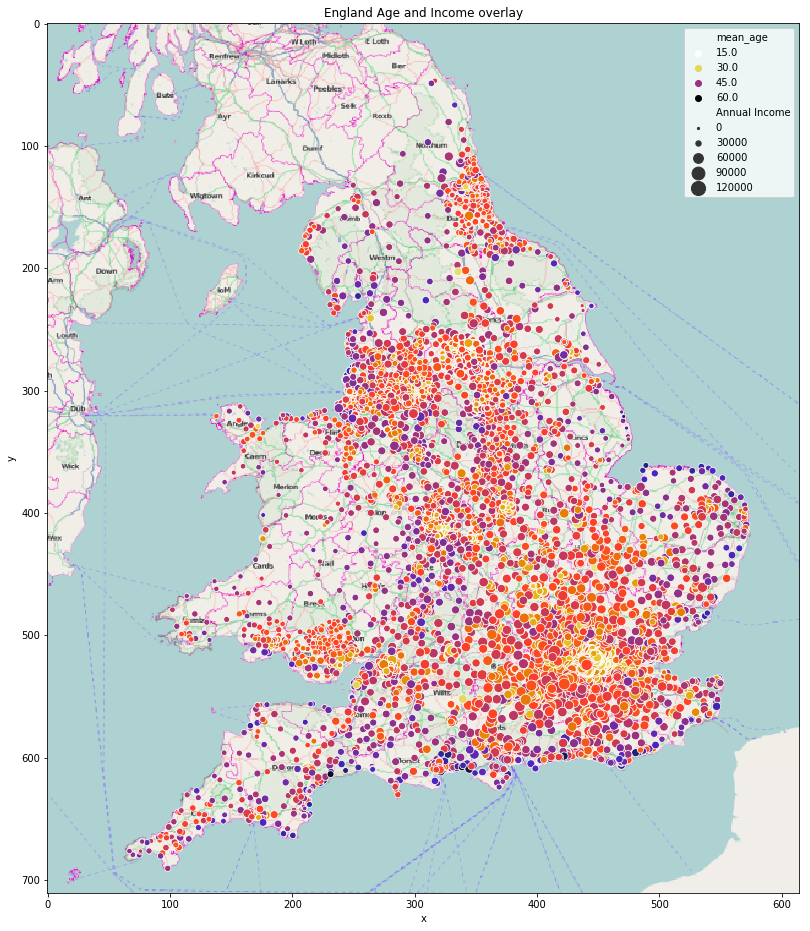

In [398]:
points = []
points.append([76,677])
points.append([541,403])

path_to_uk_map = os.path.join(os.path.abspath('..'), 'datasets', 'eng_county_map.png')
datafile = cbook.get_sample_data(path_to_uk_map)
img = plt.imread(datafile)
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(img)
sns.scatterplot(x='x', y='y', hue='mean_age', size='Annual Income', data=age_income_pos_df, palette='CMRmap_r', sizes=(5, 200))
# ax.scatter([x[0] for x in points], [x[1] for x in points])
fig.show()
ax.set_title('England Age and Income overlay')

This map overlay confirms the general expectation that young people tends to live in big city blocks, with elderly tends to aggregate by the seaside.

Income-wise, London dominates the income distribution, and there is a clear overflow effect on the income as well. England's North East seems to performs better than Wales.